In [1]:
import numpy as np
import librosa as lr
from pathlib import Path
import torch
import auraloss

from kymatio_audio import scattering_audio_distance as sad

from IPython import display as ipd

from sklearn.manifold import MDS

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 3]

In [2]:
pathAudio = 'audio/texture'
files = lr.util.find_files(pathAudio, ext=['wav']) 
files = np.asarray(files)
audio = []
 
for y in files: 
    data, sr = lr.load(y, sr = 22050,mono = True, duration=1)   
    audio.append(data)

labels = []
for f in files:
    labels.append(Path(f).stem)


a = np.hstack(audio)
import scipy.io.wavfile
scipy.io.wavfile.write('demo/texture.wav', sr, a)

ipd.Audio(a, rate=sr)

ValueError: need at least one array to concatenate

In [ ]:
mss_distances = sad.multiscale_audio_distance(audio, sr)


Max num samples 22050
Max duration 1.0 seconds.


In [ ]:


# from sklearn.manifold import TSNE
# emb = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3, metric='precomputed').fit_transform(distances)
# from sklearn.manifold import Isomap
# emb = Isomap(n_components=2, metric='precomputed').fit_transform(distances)

def plot_dist(distances, dist_type):

    emb = MDS(n_components=2, dissimilarity='precomputed', random_state=0).fit_transform(distances)
    h1 = plt.scatter(emb[:7, 0], emb[:7, 1], sizes=(np.arange(7)+1)*8, label='\\')
    plt.plot(emb[:7, 0], emb[:7, 1], linewidth=.3)
    h2 = plt.scatter(emb[7:, 0], emb[7:, 1], sizes=(np.arange(7)+1)*8, label='/')
    plt.plot(emb[7:, 0], emb[7:, 1], linewidth=.3)
    plt.legend(handles=[h1, h2])
    plt.title(dist_type)
    plt.xticks([]),plt.yticks([])
    plt.savefig('demo/texture_'+dist_type+'.png')
    plt.show()

/Users/lagrange/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


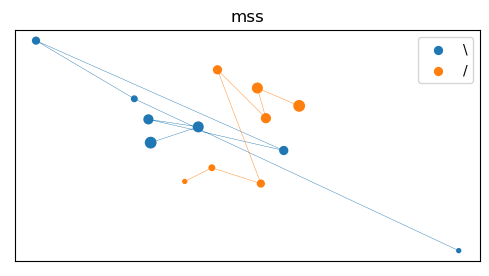

In [ ]:
plot_dist(mss_distances, 'mss')

In [ ]:
scattering_distances = sad.scattering_audio_distance(audio, sr)

Max num samples 22050
Max duration 1.0 seconds.
Time support: 1.486077097505669 seconds.


/Users/lagrange/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


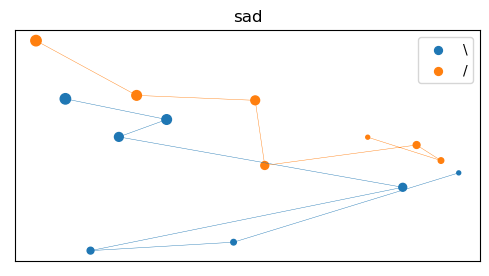

In [ ]:

plot_dist(scattering_distances, 'sad')